In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
data = pd.read_csv(r'D:\Videos\Feature engineering\Churn.csv ')

### Getting a over-view of the data 

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### The data set has no null values in any of the columns

### Data visualization

In [4]:
count_stayed = data['Churn'] == '1'
percentage = count_stayed.mean() * 100

percentage of person staying with the company 0.0


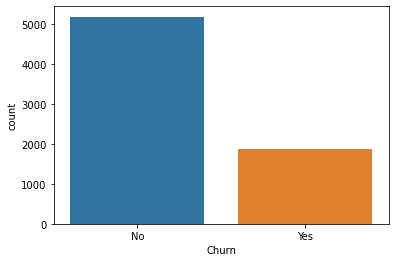

In [5]:
sns.countplot(data['Churn'])
print("percentage of person staying with the company", percentage)

##### This clearly shows that around 26 % of the customers only stayed while rest left. The number of people who left is around one third of who stayed

In [10]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [16]:
def bar_chart(feature):
    stayed = data[data['Churn']== '1'][feature].value_counts()
    left = data[data['Churn']=='0'][feature].value_counts()
    df = pd.DataFrame([stayed,left])
    df.index = ['stayed','left']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [10]:
stayed = data[data['Churn']=='1']['gender'].value_counts()
stayed

Female    939
Male      930
Name: gender, dtype: int64

In [13]:
left = data[data['Churn']=='0']['gender'].value_counts()
left

Male      2625
Female    2549
Name: gender, dtype: int64

The percentage is  Female    2550.0
Male      2626.0
Name: gender, dtype: float64


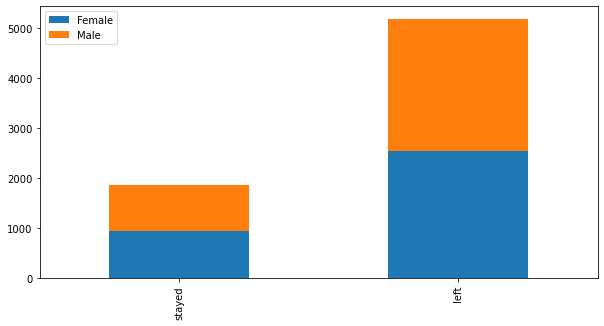

In [14]:
bar_chart('gender')

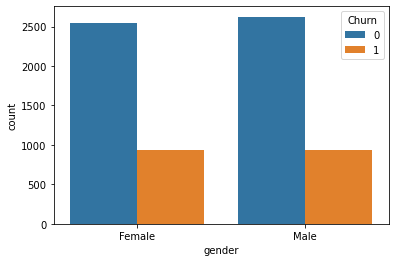

In [12]:
sns.countplot(data['gender'],hue = 'Churn', data = data)

##### Gender did not play a important role in customer attrition.

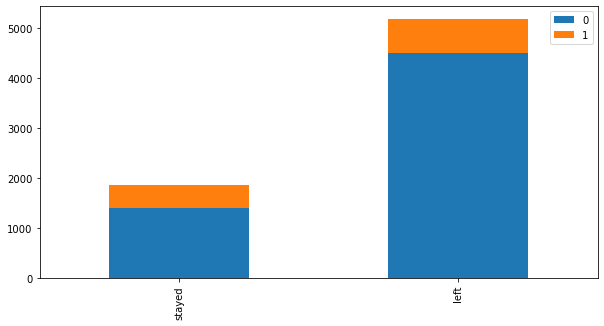

In [17]:
bar_chart('SeniorCitizen')

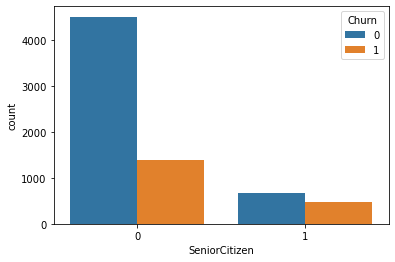

In [13]:
sns.countplot(data['SeniorCitizen'],hue = 'Churn', data = data)

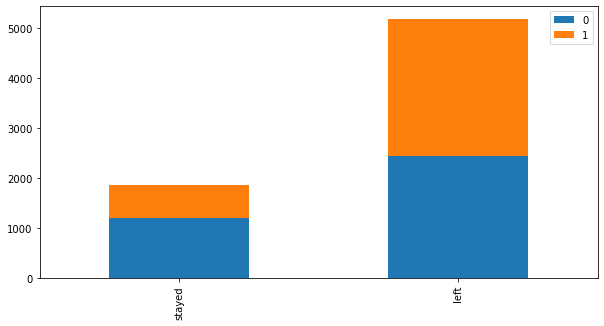

In [18]:
bar_chart('Partner')

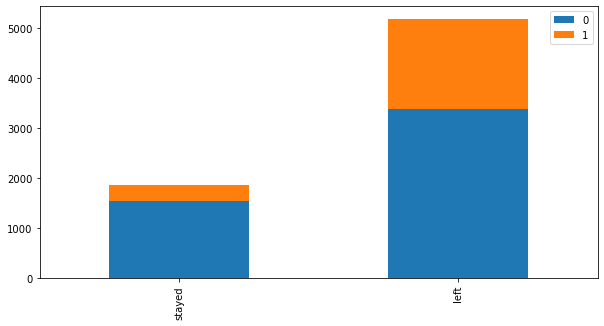

In [19]:
bar_chart('Dependents')

##### More people stayed if they were dependents in some ways

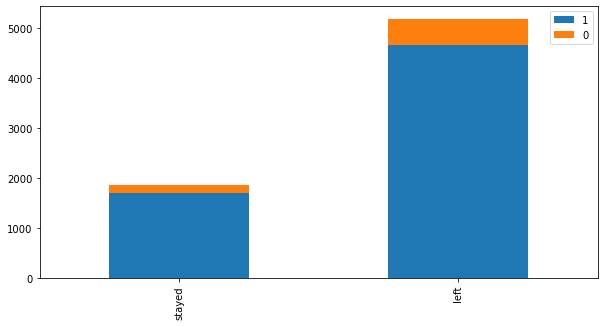

In [20]:
bar_chart('PhoneService')

##### Though many people stayed but more number of people left as well. Another observation very few people stayed without phone service.

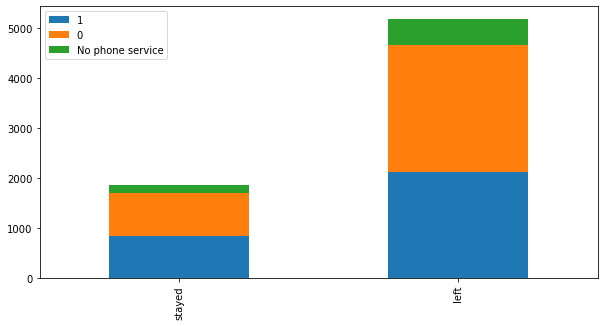

In [21]:
bar_chart('MultipleLines')

##### The data does not provide much insight and the conclusion is that more people left than stayed if multiple lines were not porvided

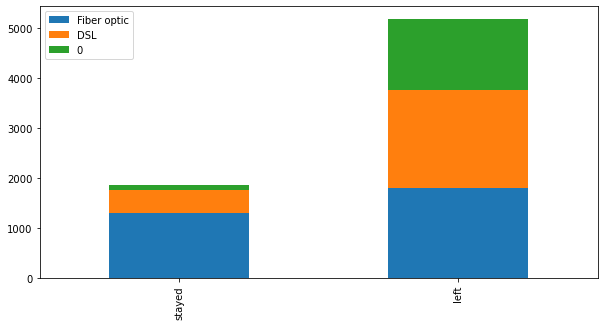

In [22]:
bar_chart('InternetService')

##### On providing fibre optic internet service more number of people stayed but on providing no internet service every customer had a tendency to leave

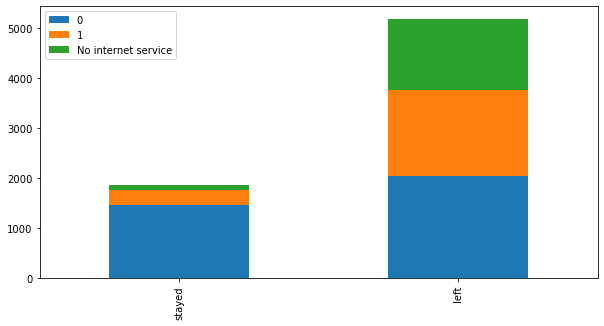

In [23]:
bar_chart('OnlineSecurity')

##### Online security is a very important for customers and a small number of people stayed because of this.

The percentage is  0                      1856.0
1                      1907.0
No internet service    1414.0
Name: OnlineBackup, dtype: float64


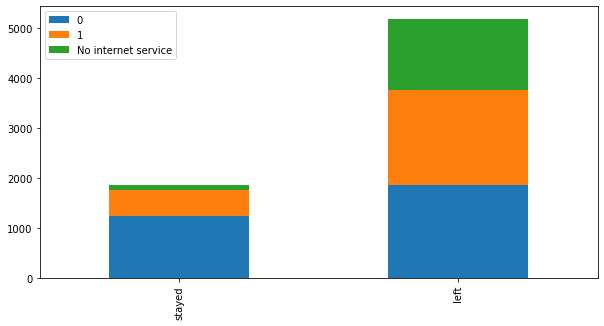

In [22]:
bar_chart('OnlineBackup')

##### Online backup played a important role in the customer attrition as well

The percentage is  0                      1885.0
1                      1878.0
No internet service    1414.0
Name: DeviceProtection, dtype: float64


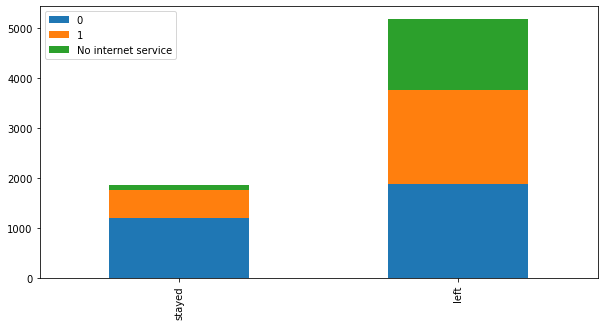

In [23]:
bar_chart('DeviceProtection')

##### More people stayed if the device protection was provided, but people left even if it was provided. This states that this is a important feature but customer's decision depended on some other features as well. 

The percentage is  0                      2028.0
1                      1735.0
No internet service    1414.0
Name: TechSupport, dtype: float64


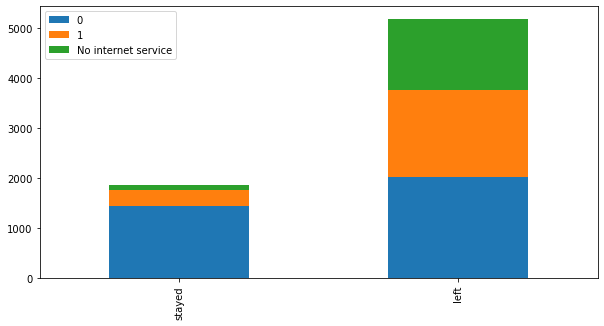

In [24]:
bar_chart('TechSupport')

##### Obviously if the company provided techsupport then the customers loved it and stayed with them 

The percentage is  0                      1869.0
1                      1894.0
No internet service    1414.0
Name: StreamingTV, dtype: float64


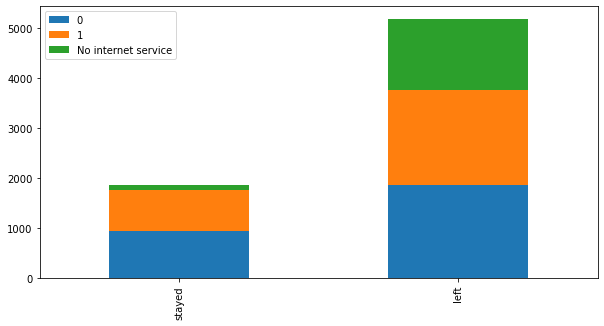

In [25]:
bar_chart('StreamingTV')

##### StreamingTV did not play a very important role in the decision of the customer but the internet service played. Customers preferred to have internet service

The percentage is  0                      1848.0
1                      1915.0
No internet service    1414.0
Name: StreamingMovies, dtype: float64


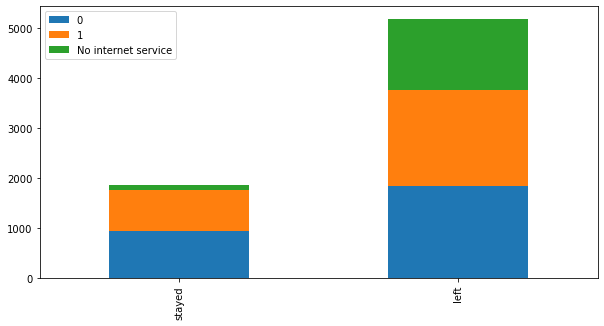

In [26]:
bar_chart('StreamingMovies')

##### The facility for streaming movie did not play a very important role for customer but the internet service played a huge role

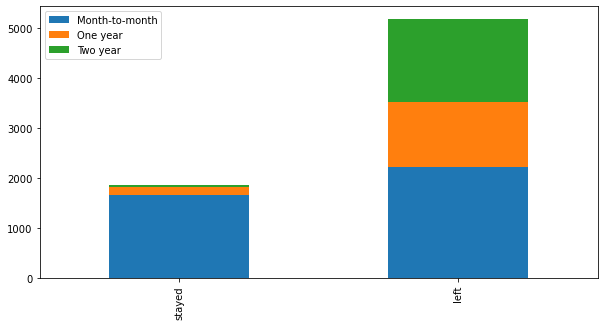

In [24]:
bar_chart('Contract')

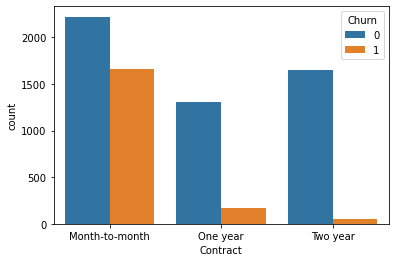

In [25]:
sns.countplot(data['Contract'], hue = 'Churn', data= data)

##### Month to Month Contract is way more preferred by the customer than an year long or two year long one 

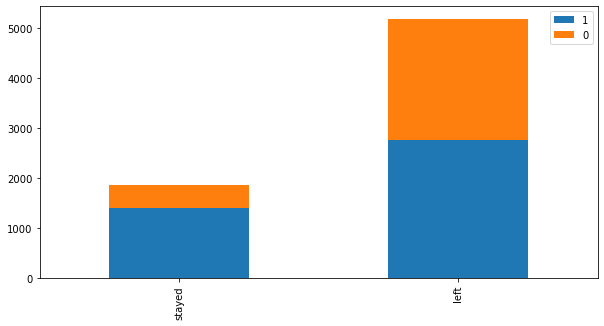

In [26]:
bar_chart('PaperlessBilling')

##### People liked paperless billing and had more tendency to stay than when billing was done with paper

The percentage is  Bank transfer (automatic)    1287.0
Credit card (automatic)      1291.0
Electronic check             1295.0
Mailed check                 1305.0
Name: PaymentMethod, dtype: float64


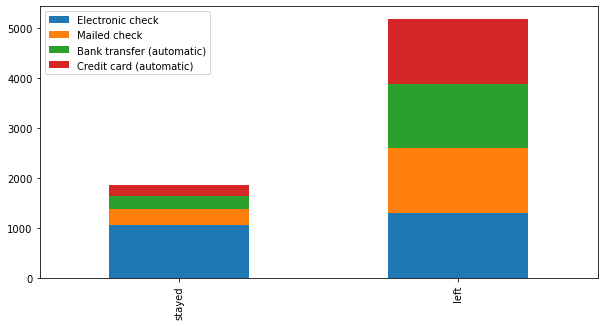

In [29]:
bar_chart('PaymentMethod')

##### This explains that the chrun is Yes if the mdoe of payment is Electronic check and huge number of people left when the payment method was credit card or bank transfer(automatic)

In [27]:
def range_feature(feature):
    R = max(data[feature]) - min(data[feature])
    print(R)

In [28]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

72


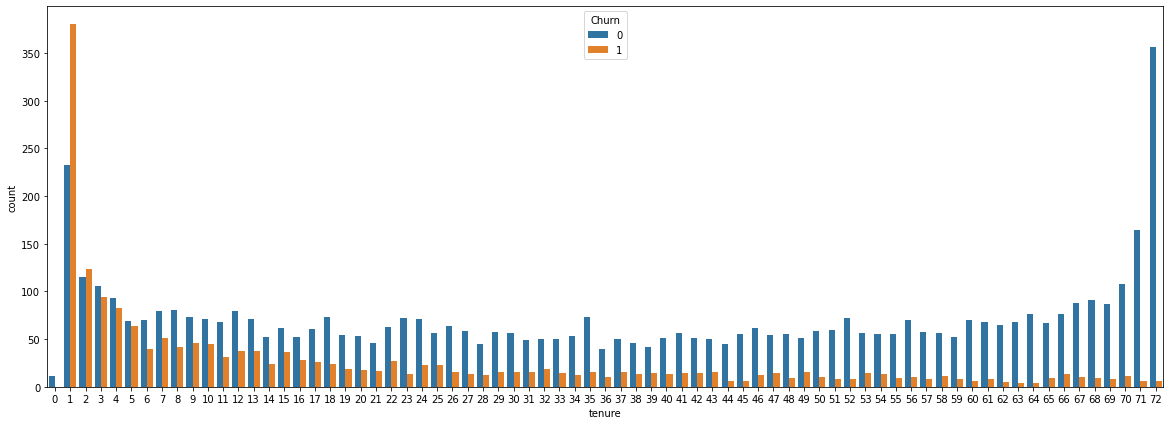

In [31]:
range_feature('tenure')
plt.subplots(figsize = (20,7))
sns.countplot('tenure',data = data,hue='Churn')

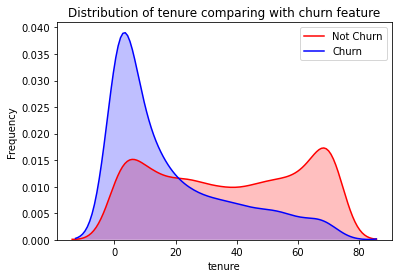

In [32]:
# tenure distibution 
g = sns.kdeplot(data.tenure[(data["Churn"] == '0') ], color="Red", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == '1') ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

##### This shows that when the tenure value is low around 1 and 2, more number of customers were staying, while as the tenure value grew higher less number of customer stayed. The optimum value for the tenure is 1. 

In [33]:
range_feature('MonthlyCharges')

100.5


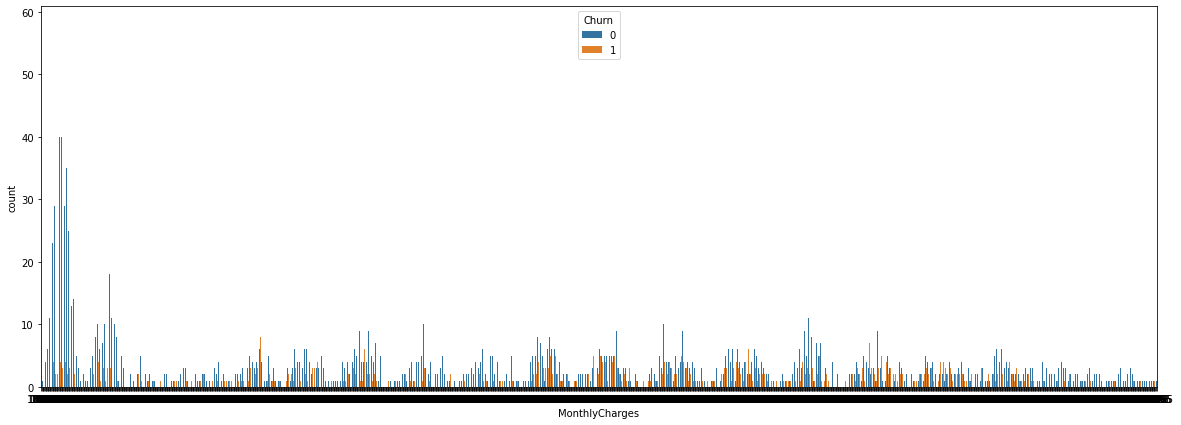

In [34]:
plt.subplots(figsize = (20,7))
sns.countplot('MonthlyCharges',data=data,hue='Churn')

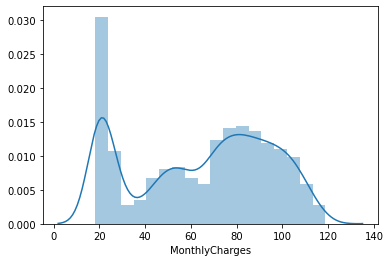

In [35]:
sns.distplot(data['MonthlyCharges'])

##### Maximum number of people paid a monthly charge of 20 or in the range of 70 to 100. 

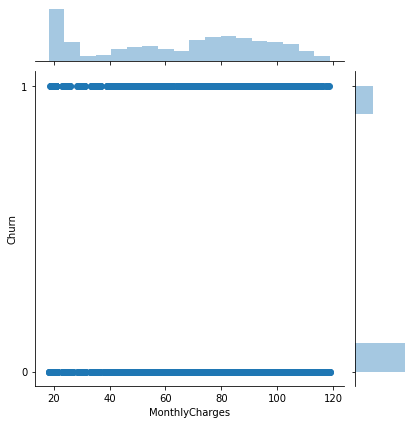

In [36]:
sns.jointplot(x= data['MonthlyCharges'],y = data['Churn'], data= data)

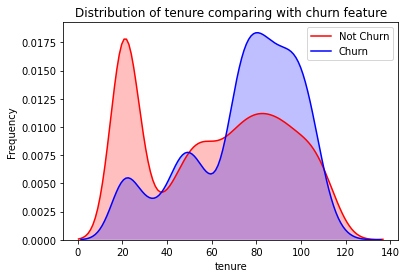

In [29]:
g = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == '0') ], color="Red", shade = True)
g = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == '1') ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

##### We can conclude that if the monthly charges and the total charges where on the lower many people stayed.

### Data preprocessing

##### Taking another look at the data

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
data['TotalCharges'].dtypes

dtype('O')

In [26]:
data['TotalCharges'].nunique 

<bound method IndexOpsMixin.nunique of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

1. So first I am dropping the customerID column because it has no effect on the churn.
2. I am replacing the yes and no values with 0 and 1 in the churn column so that the model can interpret. 
3. Performing one hot encoding on the categorical features. 

In [21]:
df2 = data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_dummies.dtypes

SeniorCitizen            int64
tenure                   int64
MonthlyCharges         float64
Churn                    int64
gender_Female            uint8
                        ...   
TotalCharges_997.75      uint8
TotalCharges_998.1       uint8
TotalCharges_999.45      uint8
TotalCharges_999.8       uint8
TotalCharges_999.9       uint8
Length: 6576, dtype: object

In [24]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6576 entries, SeniorCitizen to TotalCharges_999.9
dtypes: float64(1), int64(3), uint8(6572)
memory usage: 44.4 MB


In [27]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])


# Create Train & Test Data
from sklearn.model_selection import train_test_split


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7494677075940384


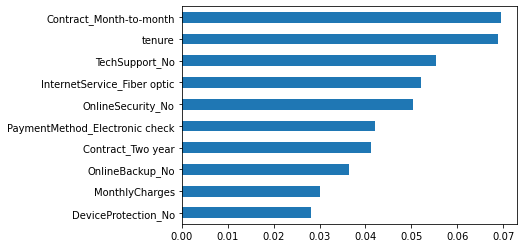

In [16]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')